In [1]:
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Data
data = pd.read_csv("./AIML Dataset.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data["isFraud"].head()
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
data["isFlaggedFraud"].head()
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
data.isnull().sum().sum()

np.int64(0)

In [10]:
data.isna().sum().sum()

np.int64(0)

In [11]:
data.shape

(6362620, 11)

In [12]:
# Percentage of fraud data

print(round(float((data["isFraud"].value_counts()[1] / data.shape[0]) * 100), 2) , "%")

0.13 %


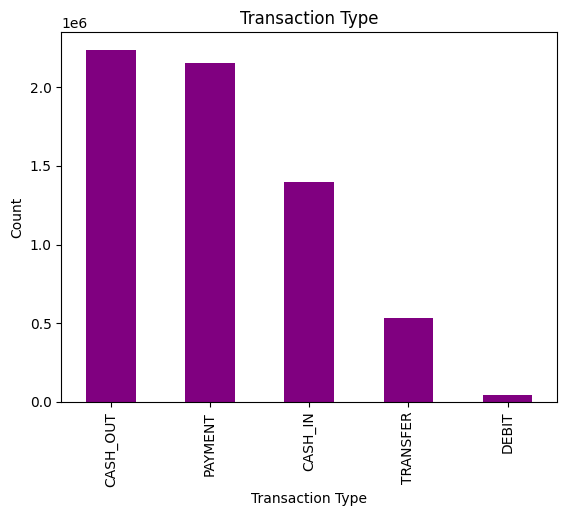

In [13]:
# Showcasing type of data in bar graph

data["type"].value_counts().plot(kind="bar", title="Transaction Type", color = "purple")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

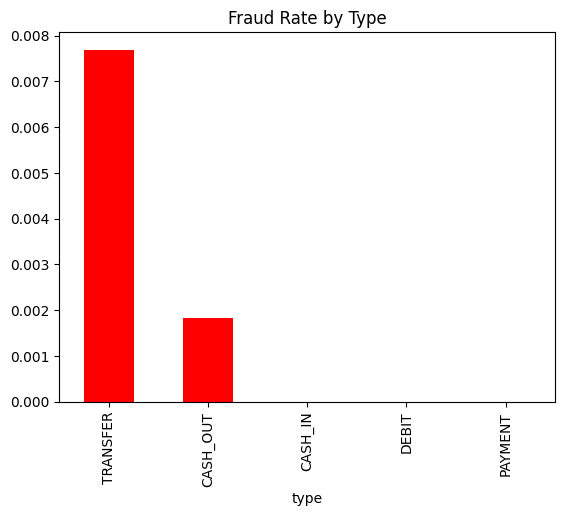

In [14]:
# fraud_by_type = data.groupby("type")
fraud_by_type = data.groupby("type")["isFraud"].mean().sort_values(ascending=False)
# print(fraud_by_type)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="red")
plt.show() 

In [15]:
data["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

/home/vijay/miniconda3/envs/ds_basics/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


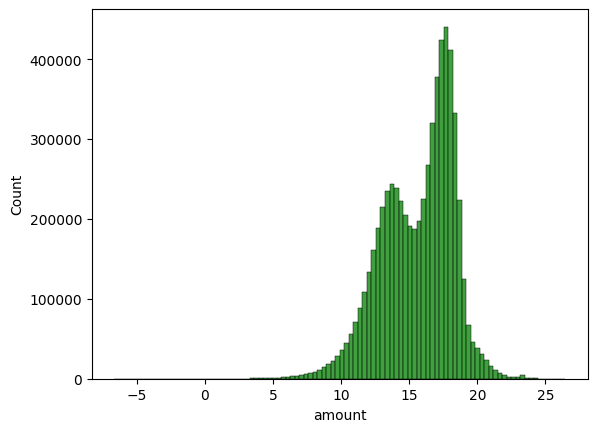

In [16]:
# sns.histplot(np.log(data["amount"]), bins=100, color="green")
# sns.histplot(np.log1p(data["amount"]), bins=100, color="green")
sns.histplot(np.log2(data["amount"]), bins=100, color="green")
plt.show()

# for i in range(20):
#     print(
#         data["amount"][i],
#         " => ",
#         np.log(data["amount"])[i],
#         np.log1p(data["amount"])[i],
#         np.log2(data["amount"])[i],
#     )

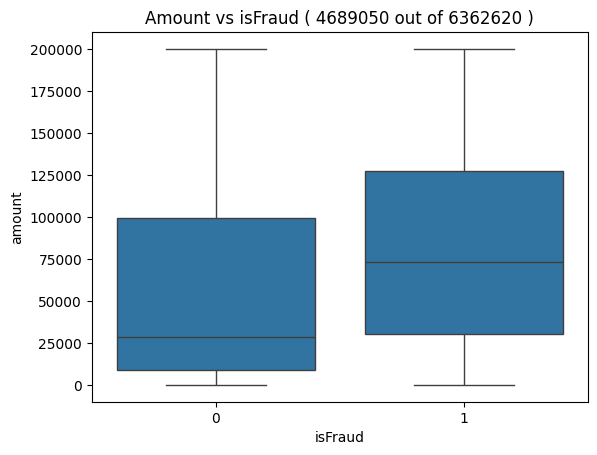

In [17]:
sns.boxplot(data = data[data["amount"] < 200000], x = "isFraud", y="amount")
plt.title(f"Amount vs isFraud ( {data[data["amount"] < 200000]["amount"].value_counts().sum()} out of {data.shape[0]} )")
plt.show()

In [18]:
# data[data["amount"] > 181]["amount"].head()

In [19]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [20]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [21]:
# data.drop(axis=1, columns=["step", "nameOrig", "nameDest"], inplace=True)
# data.drop(axis=1, columns=["isFlaggedFraud"], inplace=True)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
X = data.drop("isFraud", axis=1)
Y = data["isFraud"]

# x.head()
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [23]:
categorical = ["type"]
numericals = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [37]:
# Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numericals),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [39]:
pipeline = Pipeline([
    ("prep", preprocessor), 
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
    ])

In [41]:
pipeline.fit(x_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
y_pred = pipeline.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [52]:
print(confusion_matrix(y_test, y_pred))

[[1805447  100875]
 [    151    2313]]


In [53]:
pipeline.score(x_test, y_test)

0.9470731658761118

In [54]:
# exporting 

import joblib

joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']